# Music Information Retrieval
## Homework 1

**Instructions:**

1. Complete parts 1 through 6, filling in code in the `utils.py` file where indicated **# YOUR CODE HERE** or responses in `this notebook` where marked with **# YOUR RESPONSE HERE** or **# YOUR CODE HERE**.
2. **Document** your code. Add comments explaining what the different parts of your code are doing.
3. If you copy code from external resources (e.g. librosa's examples), include references as comments.
4. When finished, commit and push this completed notebook file along with the `utils.py` file to your GitHub repository corresponding to this homework.
5. IMPORTANT: do not modify any of the provided code.

**How to work with the `utils.py` file and Google Colab:**

You can run your code remotely with Google Colab if you add the `utils.py` file to your files' folder (search for the folder icon in the menu on the left). But **CAREFUL**, you should copy any changes you make to `utils.py` in Colab to a local copy. Each time you re-start a session the changes of any file in the files folder are lost.

**Grading:**

- This homework is worth 12 points.
- Each function you code in `utils.py` is worth 1 point, for a total of 7 points.
- Each answer in part 5 is worth 1 point, for a total of 3 points.
- Part 6 is worth 2 points, and you can have up to 2 extra points for experimenting with some of the ideas you propose.
- Points will be automatically assigned when passing tests, and manually assigned when it comes to your written responses.

**Academic integrity:**

Remember that this homework should be authored by you only. It's ok to discuss with classmates but you have to submit your own original solution.


## Sound Classification for Instrument Recognition
---

In this homework, we will explore the task of recognizing musical instruments based solely on their sound profiles. This involves distinguishing the nuanced tonal characteristics that each instrument produces, such as the sharp resonance of a violin versus the deep hum of a cello or the distinct timbre of a flute compared to a clarinet.

Starting from an available dataset of samples from different instruments, we will extract timbre-related features from the audio. Once processed, the data will be segmented into training, validation, and testing sets to ensure the model's robustness and generalization capabilities.

Using a simple model, we will analyze and critic its performance, trying to explain its behaviour to be able to improve it in the future.

In [1]:
# This notebook is for visualization and written answers only
# Your code should go in utils.py
import utils as u # to use the functions from utils, do u.function()

In [2]:
# Fix the random seed for reproducibility
from numpy.random import seed
seed(123)

## Part 1 - Load the data and split it





For this assignment we will use a subset of the Medley-Solos-DB dataset:

<blockquote>
V. Lostanlen, C.E. Cella. Deep convolutional networks on the pitch spiral for musical instrument recognition. Proceedings of the International Society for Music Information Retrieval Conference (ISMIR), 2016.
</blockquote>

This dataset is accessible to you for this homework in
[Google Drive](https://drive.google.com/file/d/1cwLSDOtnQTTF_hNOKgeK0ekFbEoinDvz/view?usp=sharing). To use it with this Colab notebook, you should download it and upload a copy on your Google Drive. You should create a `mir_datasets` folder and put the dataset there so it is accesible at `/content/drive/MyDrive/mir_datasets/medley_solos_db`.

### Part 1-A: Load the data using mirdata

In [3]:
# data_home = "/content/drive/MyDrive/mir_datasets/mini_medley_solos_db"
data_home = "../../datasets/mini_medley_solos_db/"
dataset = u.load_data(data_home)

INFO: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO: NumExpr defaulting to 8 threads.


In [4]:
# Check that the data loads correctly by loading a file
dataset.track('68d07e70-ce82-5800-f6e9-7619afaaacca').audio

(array([0.05877649, 0.07739697, 0.06003394, ..., 0.00279894, 0.00765387,
        0.01483029], dtype=float32),
 22050)

### Part 1-B: Divide the dataset into train, test, and validation splits




In [5]:
# run this to create the track lists
tracks_train, tracks_validate, tracks_test = u.split_data(dataset.load_tracks())

print("There are {} tracks in the training set".format(len(tracks_train)))
print("There are {} tracks in the validation set".format(len(tracks_validate)))
print("There are {} tracks in the test set".format(len(tracks_test)))

There are 584 tracks in the training set
There are 349 tracks in the validation set
There are 1224 tracks in the test set


## Part 2: Extract Features


### Part 2-A: Compute the MFCCs of a track


In [6]:
track = dataset.track('68d07e70-ce82-5800-f6e9-7619afaaacca')
y_test, fs_test = track.audio

mfcc = u.compute_mfccs(y_test, fs_test)

print("{} time frames, {} mfcc coefficients".format(mfcc.shape[0], mfcc.shape[1]))

129 time frames, 19 mfcc coefficients


### Part 2-B: Compute summary statistics




In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

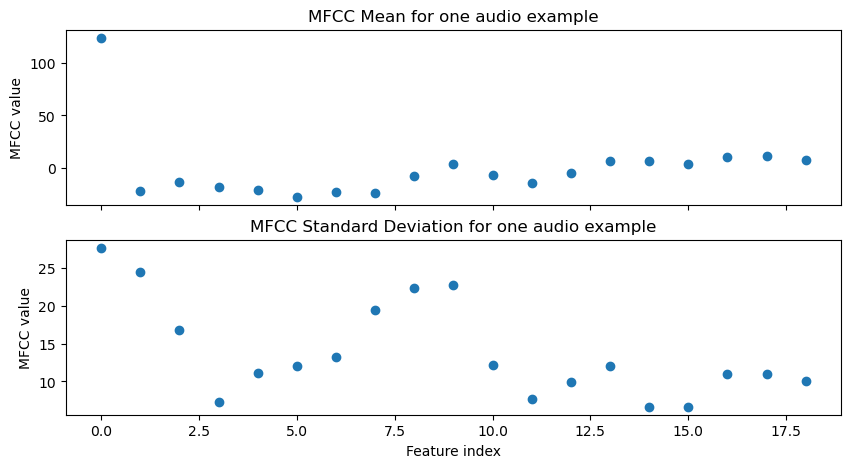

In [8]:
# test your function by running this code
mean, std = u.get_stats(mfcc)

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,5), sharex=True)
ax1.plot(np.arange(len(mean)), mean, 'o')
ax1.set_title("MFCC Mean for one audio example")
ax1.set_ylabel("MFCC value")
ax2.plot(np.arange(len(std)), std, 'o')
ax2.set_title("MFCC Standard Deviation for one audio example")
ax2.set_xlabel("Feature index")
ax2.set_ylabel("MFCC value")

plt.show()

## Part 3: Prepare the Data


### Part 3-A: Compute features for all data and reshape





### Part 3-B: Normalize the Data



In [9]:
# We normalize all features with the stats of the training data for assessing generalization

# Load here the data if you saved the features!
# ....
X_raw_train = np.load('X_raw_train.npy')
X_raw_validate = np.load('X_raw_validate.npy')
X_raw_test = np.load('X_raw_test.npy')

Y_train = np.load('Y_train.npy')
Y_validate = np.load('Y_validate.npy')
Y_test = np.load('Y_test.npy')

mu, sigma = u.get_stats(X_raw_train)

X_train = u.normalize(X_raw_train, mu, sigma)
X_validate = u.normalize(X_raw_validate, mu, sigma)
X_test = u.normalize(X_raw_test, mu, sigma)

## Part 4: Training and validation

5


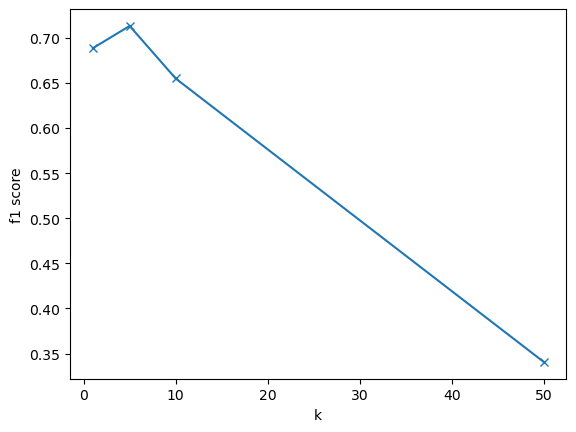

In [10]:
# run this to train the models
knn_clf, best_k = u.fit_knn(X_train, Y_train, X_validate, Y_validate)
print(best_k)

## Part 5: Analysis

In [11]:
from sklearn.metrics import f1_score, precision_score, recall_score

### Part 5-A: Compute predictions and evaluate


1. Predict the labels for the test set.
2. Compute & print the average f1_score (or f_measure) in the dataset.

Hint: Look at the documentation of Sklearn on how to do the predictions, evaluation, etc.

`# YOUR RESPONSE HERE`

In [12]:
# YOUR CODE HERE
test_pred = knn_clf.predict(X_test)

test_f1_weighted = f1_score(Y_test, test_pred, average='weighted')
test_precision = precision_score(Y_test, test_pred, average='weighted')
test_recall = recall_score(Y_test, test_pred, average='weighted')
# test_f1_macro = f1_score(Y_test, test_pred, average='macro')
# test_f1_micro = f1_score(Y_test, test_pred, average='micro')

print("The weighted f1_score is %.3f " %(test_f1_weighted))
print("The weighted precision score is %.3f " %(test_precision))
print("The weighted recall score is %.3f " %(test_recall))
# print("The macro f1_score is %.3f " %(test_f1_macro))
# print("The micro f1_score is %.3f " %(test_f1_micro))

The weighted f1_score is 0.487 
The weighted precision score is 0.637 
The weighted recall score is 0.560 


### Part 5-B: Compute a confusion matrix
1. Compute the confusion matrix (use `sklearn.metrics.confusion_matrix`)
2. Plot the confusion matrix (see the example [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)).


`# YOUR RESPONSE HERE`

Classwise f1_scores are  [0.462 0.794 0.742 0.095 0.679 0.    0.433 0.608]
Classwise precision scores are  [0.526 0.786 0.9   0.8   0.522 0.    0.684 0.501]
Classwise recall scores are  [0.411 0.802 0.632 0.05  0.973 0.    0.317 0.772]


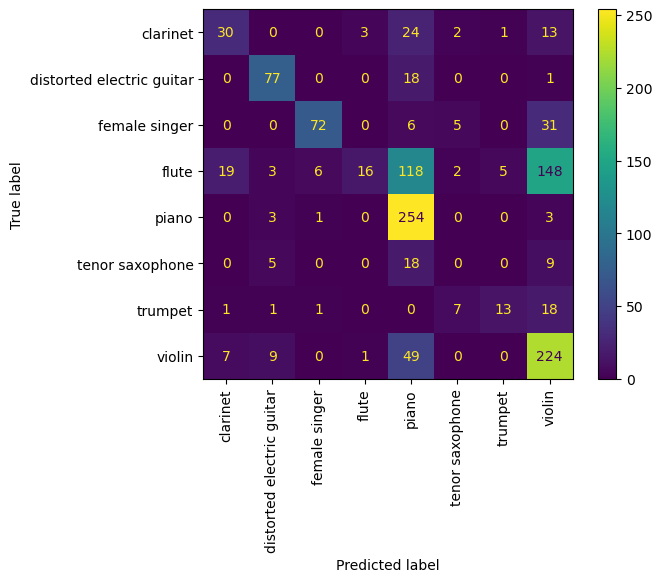

In [13]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

instruments = [track.instrument for track in tracks_train]
classes = np.unique(instruments).tolist()

test_f1_all = f1_score(Y_test, test_pred, average=None)
test_precision_all = precision_score(Y_test, test_pred, average=None)
test_recall_all = recall_score(Y_test, test_pred, average=None)
print("Classwise f1_scores are ", np.round(test_f1_all,3))
print("Classwise precision scores are ", np.round(test_precision_all,3))
print("Classwise recall scores are ", np.round(test_recall_all,3))

test_cm = confusion_matrix(Y_test, test_pred, labels=knn_clf.classes_)
# np.fill_diagonal(test_cm, 0)
disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=classes)
disp.plot(xticks_rotation='vertical')
plt.show()

### Part 5-C: Perform Error Analysis


1. Which instrument class has the best & worst performance?
2. For the worst source, what other sources are commonly confused? Why?
3. Listen to the audio for examples the classifier got wrong. What do they have in common?

Hint: to listen to the audio you can use `ipd.Audio` from `IPython.display`.

`# YOUR RESPONSE HERE`

### 5-C Answers

1. From above classwise F1 scores,
best performance - class 1 distorted electric guitar, and
worst performance - class 5 tenor saxophone

2. For the tenor saxophone, the most confused classes seem to be piano and violin. Below I've found 5 sounds each that were saxophone but classified as piano and violin.
I could clearly hear them as saxophone and I didn't observe any important pattern in the saxophone sounds that were misclassified. So I checked the training data class proportions and I did spot a problem.

3. The saxophone is the class with the least number of instances in each of training, validation and test datasets (percentages printed below). Clearly the data seems too little for the model to separate saxophone in the feature space. And the classes it is getting most confused with, piano and violin are the largest classes in our dataset. It does make sense that when looking for nearest neighbors, the model might find piano and violin points in the feature space just because of the sheer size of them in the dataset

In [14]:
# YOUR CODE HERE
# Check the misclassified saxophone examples
import IPython.display as ipd

def c1_as_c2(true_class, predicted_class):
    """
        Function that returns True for indices in tracks_test that belong to true_class but 
        get predicted as predicted_class. Returns False for all other indices
    """
    true_class_id = classes.index(true_class)
    predicted_class_id = classes.index(predicted_class)
    
    return (Y_test==true_class_id) & (test_pred==predicted_class_id)

sax_as_piano = [track.audio for track, select in zip(tracks_test, c1_as_c2('tenor saxophone', 'piano')) if select]
sax_as_violin = [track.audio for track, select in zip(tracks_test, c1_as_c2('tenor saxophone', 'violin')) if select]


print("Saxophone tracks classified as piano")
for track in sax_as_piano[:5]:
    audio = track[0]
    sr = track[1]
    ipd.display(ipd.Audio(audio, rate=sr))
 
print("Saxophone tracks classified as violin")
for track in sax_as_violin[:5]:
    audio = track[0]
    sr = track[1]
    ipd.display(ipd.Audio(audio, rate=sr))


Saxophone tracks classified as piano


Saxophone tracks classified as violin


In [15]:
def proportion(arr, title):
    """
    Prints the percent of elements belonging to each class from 0 to 7
    """
    print("Stats of %s" %(title))
    elem, cnt = np.unique(np.array(arr),return_counts=True)
    print(elem)
    print(np.round(cnt*100/sum(cnt),2))

proportion(Y_train, "train")
proportion(Y_validate, "validation")
proportion(Y_test, "test")

Stats of train
[0 1 2 3 4 5 6 7]
[ 4.28  6.85  5.48  2.74 41.1   2.05  2.57 34.93]
Stats of validation
[0 1 2 3 4 5 6 7]
[ 9.46 14.33  8.02  6.59 29.23  0.86  2.01 29.51]
Stats of test
[0 1 2 3 4 5 6 7]
[ 5.96  7.84  9.31 25.9  21.32  2.61  3.35 23.69]


## Part 6: Ideas for improving

1. Describe and discuss some ideas for improving the results you have so far.
2. Try experimenting with some of the ideas you propose and see if they work.

I had initially planned to attempt the following modifications on the pipeline -
1. Add more features, from time and frequency domain
2. Feature Selection Algorithms to reduce correlated and redundant features
3. Trying other Machine Learning Models

I finally attempted 1 and 3, I experimented with 2 but didn't get any improvements

## Part 7: Frequency Domain Features

In [16]:
import librosa

In [17]:
def compute_frequency_domain_features(y, sr, n_fft=2048, hop_length=512):
    sc = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length).T
    bw = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length).T
    sr = librosa.feature.spectral_rolloff(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length).T
    
    return sc, bw, sr

## Part 8: Time Domain Features

In [18]:
def compute_time_domain_features(y, sr, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(y=y, frame_length=frame_length, hop_length=hop_length).T
    rms = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length).T
    
    return zcr, rms

## Part 9: Dataset with All Features

In [19]:
def get_all_features_and_labels(track_list, time_flag=True, freq_flag=True, mfcc_flag=True):
    feature_matrix = []; label_array = []
    
    for track in track_list:
        y, sr = track.audio
        
        # Compute Features
        mfcc = u.compute_mfccs(y,sr)
        sc, bw, sr = compute_frequency_domain_features(y, sr)
        zcr, rms = compute_time_domain_features(y, sr)
        
        # Features to Use
        feature_list = []
        if mfcc_flag:
            feature_list.extend([mfcc])
        if freq_flag:
            feature_list.extend([sc, bw, sr])
        if time_flag:
            feature_list.extend([zcr, rms])
            
        # Calculate mean and std across time
        feature_row = np.array([])
        for feature in feature_list:
            mean, std = u.get_stats(feature)
            feature_row = np.append(feature_row, (mean,std))
        
        # Add all features and label for each track to the arrays to be returned
        feature_matrix.append(feature_row)
        label_array.append(track.instrument_id)
        
    return np.array(feature_matrix), np.array(label_array)

In [20]:
# All Features fetched from Numpy Arrays
X_all_raw_train = np.load('X_all_raw_train.npy')
X_all_raw_validate = np.load('X_all_raw_validate.npy')
X_all_raw_test = np.load('X_all_raw_test.npy')

Y_train = np.load('Y_train.npy')
Y_validate = np.load('Y_validate.npy')
Y_test = np.load('Y_test.npy')

mu, sigma = u.get_stats(X_all_raw_train)

X_all_train = u.normalize(X_all_raw_train, mu, sigma)
X_all_validate = u.normalize(X_all_raw_validate, mu, sigma)
X_all_test = u.normalize(X_all_raw_test, mu, sigma)

## Part 10: ML Algorithms Evaluation

In [21]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [22]:
def fit_knn(train_features, train_labels, validation_features, validation_labels):
    # Define the classifier
    clf = KNeighborsClassifier(n_neighbors=5)
    
    # Fit the classifier on training data
    clf.fit(train_features, train_labels)
    
    # Predict on validation set
    validation_pred = clf.predict(validation_features)
    
    # weighted f1 score on validation set
    val_f1_weighted = f1_score(validation_labels, validation_pred, average='weighted')
    print("The weighted f1_score on validation set is %.3f " %(val_f1_weighted))
    
    return clf

In [23]:
def model_evaluate(model, title, test_features, test_labels):
    test_pred = model.predict(test_features)
    
    # Metrics computed on Validation Set
    print("%s Model Metrics on Test Set" %(title))
    
    # accuracy
    test_accuracy = accuracy_score(test_labels, test_pred)
    print('Accuracy on test set is %.3f' %(test_accuracy))
    
    # weighted f1 score
    test_f1_weighted = f1_score(test_labels, test_pred, average='weighted')
    print("The weighted f1_score on test set is %.3f " %(test_f1_weighted))
    
    # f1 scores for all classes
    test_f1_all = f1_score(test_labels, test_pred, average=None)
    print("Classwise f1_scores for test set are ", np.round(test_f1_all,3))
    
    # confusion matrix
    test_cm = confusion_matrix(test_labels, test_pred, labels=model.classes_)
    # np.fill_diagonal(test_cm, 0)
    disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=classes)
    disp.plot(xticks_rotation='vertical')
    plt.show()

### KNN on all Features

The weighted f1_score on validation set is 0.768 
KNN Model Metrics on Test Set
Accuracy on test set is 0.569
The weighted f1_score on test set is 0.494 
Classwise f1_scores for test set are  [0.384 0.755 0.74  0.101 0.691 0.04  0.375 0.66 ]


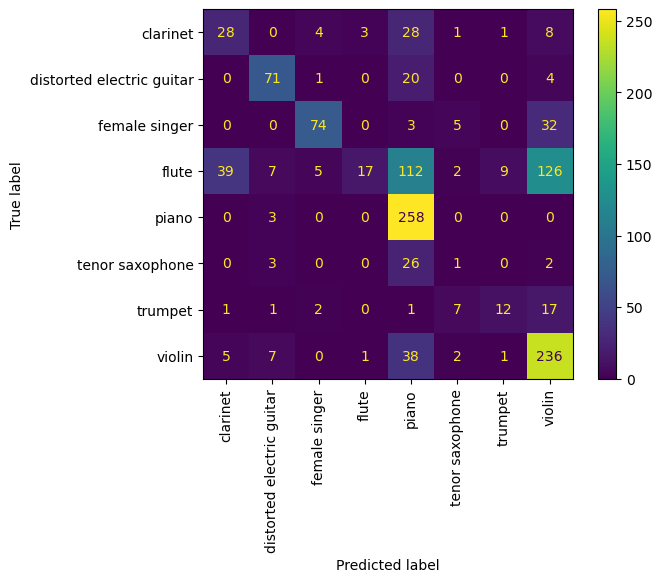

In [24]:
# KNN on all Features
model = fit_knn(X_all_train, Y_train, X_all_validate, Y_validate)
model_evaluate(model, "KNN", X_all_test, Y_test)

## The weighted F1 score on Test Set using only MFCC was 0.487 which improved to 0.494 when using Time and Frequency Domain Features. KNN using only MFCC features has been computed again below

### KNN on MFCC Features

The weighted f1_score on validation set is 0.713 
KNN Model Metrics on Test Set
Accuracy on test set is 0.560
The weighted f1_score on test set is 0.487 
Classwise f1_scores for test set are  [0.462 0.794 0.742 0.095 0.679 0.    0.433 0.608]


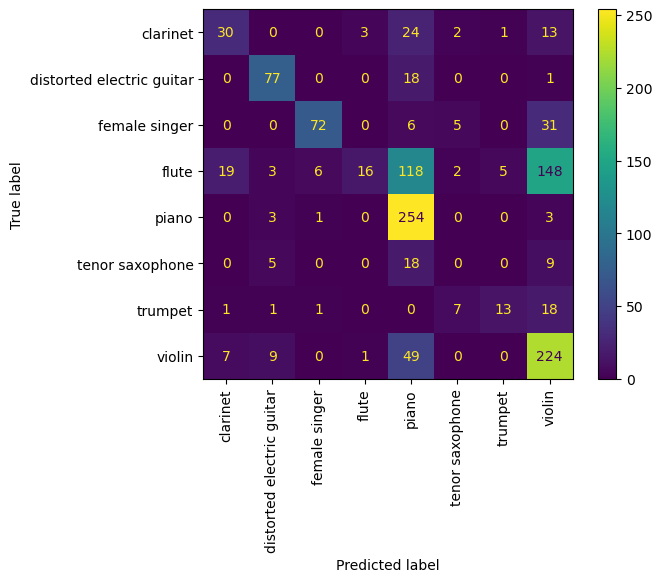

In [25]:
# KNN on MFCC Features
model = fit_knn(X_train, Y_train, X_validate, Y_validate)
model_evaluate(model, "KNN", X_test, Y_test)

## Next step was to try another algorithm for improving the model. I used the XGBoost Algorithm which is great at fitting models even with low data. I also added a class balancing factor so that more weight could be attached to classes that are underrepresented in the data

In [26]:
from sklearn.utils.class_weight import compute_sample_weight

def fit_xgboost(train_features, train_labels, validation_features, validation_labels):
    # Define the classifier
    clf = XGBClassifier(random_state=42)
    sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=train_labels)
    
    # Fit the Model on Training Set
    clf.fit(train_features, train_labels, sample_weight=sample_weights)
    
    # Predict on validation set 
    validation_pred = clf.predict(validation_features)
    
    # weighted f1 score on validation set
    val_f1_weighted = f1_score(validation_labels, validation_pred, average='weighted')
    print("The weighted f1_score on validation set is %.3f " %(val_f1_weighted))
    
    return clf

### XGBoost on All Features

The weighted f1_score on validation set is 0.736 
XGBoost Model Metrics on Test Set
Accuracy on test set is 0.657
The weighted f1_score on test set is 0.605 
Classwise f1_scores for test set are  [0.352 0.716 0.772 0.253 0.785 0.048 0.622 0.846]


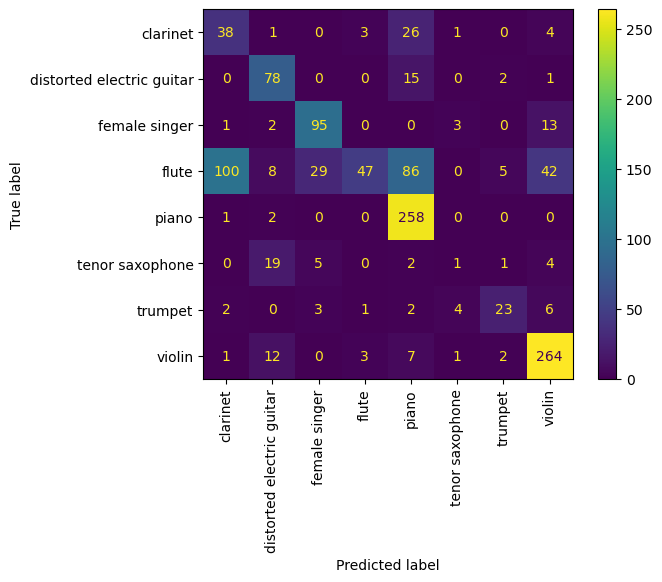

In [27]:
# XGBoost on all features
model = fit_xgboost(X_all_train, Y_train, X_all_validate, Y_validate)
model_evaluate(model, "XGBoost", X_all_test, Y_test)

## We get a decent jump in the weighted F1 score of test set from 0.494 to 0.605. Since this seems to be the best performing model, I'm going to train this model on both train and validation dataset and then finally evaluate on Test set

The weighted f1_score on validation set is 0.668 
XGBoost Model Metrics on Test Set
Accuracy on test set is 0.699
The weighted f1_score on test set is 0.668 
Classwise f1_scores for test set are  [0.348 0.806 0.838 0.349 0.801 0.318 0.753 0.893]


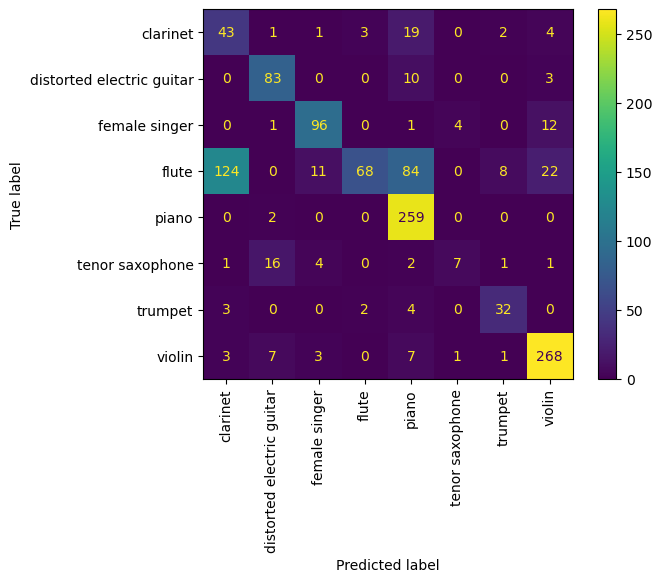

In [28]:
X_all_train_validate = np.vstack((X_all_train, X_all_validate))
Y_train_validate = np.append(Y_train, Y_validate)

# XGBoost on all features with train and validation data
model = fit_xgboost(X_all_train_validate, Y_train_validate, X_all_test, Y_test)
model_evaluate(model, "XGBoost", X_all_test, Y_test)

## The final model that I've got, trained with Time Domain, Frequency Domain, and MFCC Features using XGBoost Algorithm, on both Training and Validation Datasets has a 
## weighted F1 Score = 0.668, on the Test Set.

# References 

1. Scikit Learn Documentation - https://scikit-learn.org/stable/
2. XGBoost Documentation - https://xgboost.readthedocs.io/en/stable/get_started.html
3. XGBoost for multiclassification and imbalanced data - https://stackoverflow.com/questions/67868420/xgboost-for-multiclassification-and-imbalanced-data
4. Librosa - https://librosa.org/doc/latest/index.html